# snscrape experimentation

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the raw scraped data
tweets_df = pd.read_json('nedtsj.json', lines = True)

# load the players JSON for the correct squad
with open('spelers.json') as f:
    players = json.load(f)['NEDTSJ']
players = pd.DataFrame.from_dict(players).set_index('id')
players['aliases'] = players[['last_name', 'twitter']].values.tolist()

# create a working dataframe that contains the tweets and mention count columns for each player
df = pd.DataFrame(tweets_df['renderedContent'])
df = df.reindex(columns = df.columns.tolist() + [player for player in players.last_name]).fillna(0)

In [3]:
# fill the count columns for the players, based on whether or not they are mentioned in a tweet
for i, row in df.iterrows():
    for j, p_row in players.iterrows():
        for alias in p_row.aliases:
            if alias and (alias.lower() in row.renderedContent.lower()):
                df.at[i, p_row.last_name] += 1

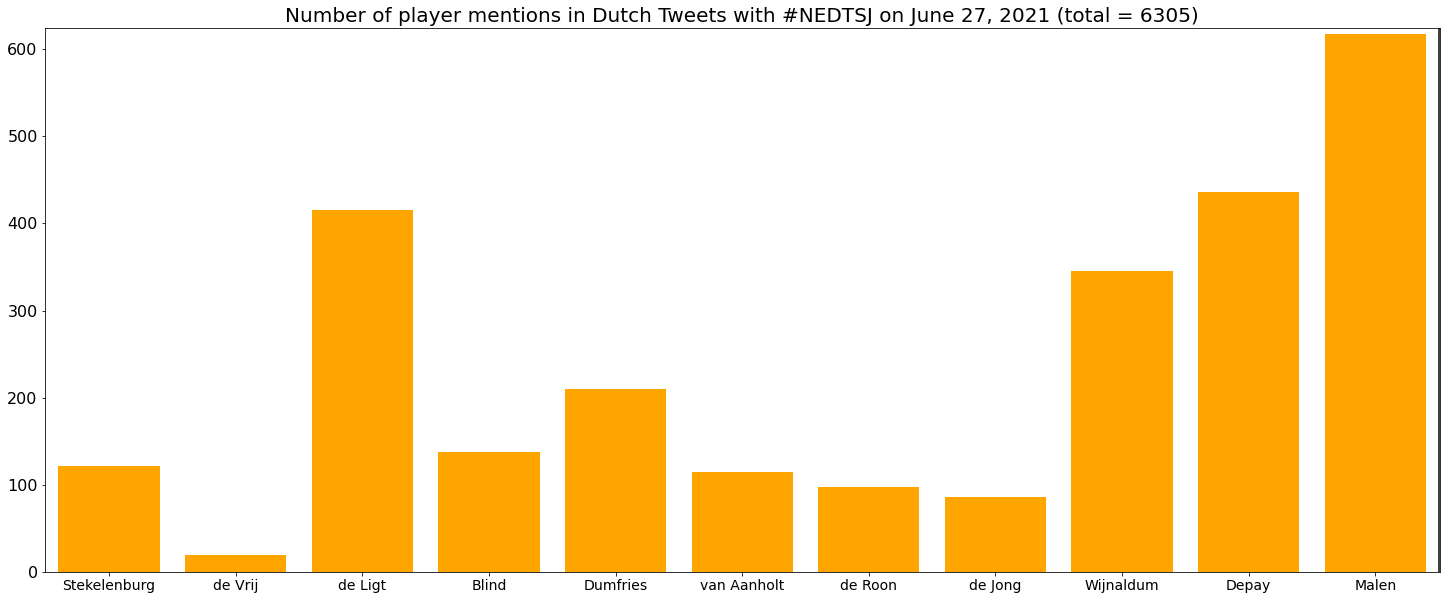

In [5]:
# get counts of how often names are mentioned
tweetcounts = [df[ln].sum() for ln in players.last_name]

# plot tweetcounts for Dutch players
fig, ax = plt.subplots(figsize=(25, 10))
plt.margins(0.01)
plt.bar(players.last_name, tweetcounts, color = 'orange')
plt.axvline(10.5, color = 'black')
plt.xticks(size=14)
plt.yticks(size=16)
plt.title('Number of player mentions in Dutch Tweets with #NEDTSJ on June 27, 2021 (total = 6305)', size = 20)
plt.show()